**Укрупнённый план концепции создания аналитического модуля для оценки эффекта продуктовых изменений на основе метода Difference-in-Differences**

**1\. Введение**

*Актуальность*

В современной digital-экономике ключевым конкурентным преимуществом является скорость итераций и data-driven подход к развитию продуктов. Крупные технологические компании, такие как Ozon, ежедневно запускают десятки продуктовых изменений — от незначительных улучшений интерфейса до фундаментальных изменений в бизнес-логике. Золотым стандартом оценки эффективности таких изменений являются A/B-тесты, позволяющие измерить causal effect с высокой точностью.

Однако стремительный рост бизнеса и усиление конкуренции создают ситуации, когда проведение классического A/B-теста невозможно или экономически нецелесообразно. Согласно внутренней статистике Ozon, до 30% гипотез не могут быть протестированы через стандартный сплит-тест из-за технических ограничений, этических соображений или высоких операционных издержек

**Проблемы текущего состояния**

Продуктовые команды Ozon — продукт-менеджеры, аналитики и инженеры — сталкиваются с системными ограничениями при валидации гипотез:

- **Высокий time-to-market**: Полный цикл A/B-теста (разработка двух версий, запуск, набор статистической значимости) занимает от 1 до 4 недель, что неприемлемо в условиях быстро меняющегося рынка.

- **Операционные издержки**: Поддержка двух версий функционала увеличивает нагрузку на разработку и тестирование на 40-60%.

- **Этический/бизнесовый барьер**: Невозможность проведения A/B-теста для изменений, влияющих на всех пользователей одновременно (изменения в алгоритмах рекомендаций, общеплатформенные акции, обновления юридических документов).

- **Риск ошибок**: Вероятность технических сбоев и ошибок в механизме сплитования оценивается в 3-5%, что ставит под сомнение результаты даже корректно спланированного эксперимента

**Ограничения существующих решений**

Существующие подходы к оценке изменений в Ozon фрагментированы и не стандартизированы:

- **Метод Before-After**: Не учитывает внешние факторы и сезонность, что приводит к смещённым оценкам.

- **Простой подбор контрольной группы**: Не обеспечивает сопоставимости групп по ключевым характеристикам, игнорирует предположение о параллельных трендах.

- **Отсутствие сквозного инструмента**: Аналитики вынуждены вручную создавать одноразовые скрипты для каждой оценки, что приводит к непоследовательности методологии и воспроизводимости результатов.

Таким образом, существует критический разрыв между потребностью продуктовых команд в быстрой и надежной оценке изменений и возможностями существующих инструментов экспериментальной платформы Ozon.

**Для достижения поставленной цели необходимо решить следующие задачи**:

- Формализовать процесс и критерии применения метода Diff-in-Diff для продуктовой аналитики Ozon.

- Разработать алгоритм автоматического подбора контрольной группы на основе методов матчинга (Propensity Score Matching, Nearest Neighbors).

- Реализовать автоматизированную проверку ключевого предположения метода — параллельности трендов метрик в предпериоде.

- Создать единый, целостный инструмент, который покрывает весь путь данных от сырой информации до готового бизнес-вывода, без необходимости переключения между разными системами или ручного переноса данных, модуль в виде Jupyter Notebook на Python, интегрированный с данными трекера Ozon.

- Провести практические испытания разработанного модуля на исторических данных завершенных A/B-тестов Ozon, чтобы проверить его работоспособность.

**Методы исследования**

В работе используются следующие методы:

- Квазиэкспериментальные методы causal-инference: Difference-in-Differences.

- Методы матчинга: Propensity Score Matching, k-Nearest Neighbors для формирования сопоставимых групп.

- Статистический анализ: Бутстрап для построения доверительных интервалов, регрессионный анализ для верификации результатов.

- Визуализация данных: Построение интерактивных графиков для проверки предположений и интерпретации результатов.

**Практическая значимость работы**
- Практическая значимость работы заключается в создании стандартизированного инструмента, который позволяет:

- Продуктовым командам сократить время первичной оценки гипотезы с 1-2 недель до 1-2 дней, ускоряя итерационный цикл и time-to-market.

- Продуктовым аналитикам автоматизировать рутинные операции по подбору групп и проверке статистических предположений, сосредоточившись на интерпретации результатов.

- Компании Ozon снизить операционные издержки на разработку и поддержку механизма A/B-тестирования для гипотез, не требующих максимальной точности.

- Бизнесу принимать более обоснованные решения о запуске изменений, снижая риски откатов и негативного impact на пользовательский опыт и ключевые метрики.

**2. ОПИСАНИЕ ПРОБЛЕМЫ, ЦЕЛИ, ОГРАНИЧЕНИЯ И ПРИОРИТЕТНЫЕ КЛИЕНТСКИЕ ПУТИ**

| **Диаграмма C4** | **Что? (Данные)** | **Как? (Функция)** | **Где? (Сеть/Инфраструктура)** | **Кто?** | **Когда? (Время)** | **Почему?** |
| --- | --- | --- | --- | --- | --- | --- |
| **Контекстная (Цели)** | Сырые события из трекера (клики, просмотры); Агрегированные метрики на пользователя | Оценка влияния продуктовых изменений без проведения A/B-тестов для ускорения принятия решений | Защищенная IT-инфраструктура Ozon (JupyterHub, хранилище данных) | Продуктовый аналитик, Продукт-менеджер, Data Engineer | После запуска фичи в прод; Этап предварительной проверки гипотез | Снижение time-to-market, сокращение затрат на разработку A/B-тестов |
| **Контейнерная (Архитектура)** | Файлы дампов (Parquet); DataFrame в памяти; Кешированные модели подбора групп | Jupyter Notebook (логические блоки: загрузка, подбор групп, валидация, расчет, визуализация) | Выделенный Jupyter Server в контуре Ozon | Продуктовый аналитик (пользователь); Трекер (источник) | Время выполнения анализа | Создание автономного, интерпретируемого и воспроизводимого инструмента для причинного анализа |
| **Компонентная (Модули)** | Объекты данных: UserMetric, PrePostPeriod, ControlTestGroup; Результаты статистических тестов | Модули:  <br>1. DataLoader - загрузка и предобработка.  <br>2. GroupSelector - подбор контрольной группы.  <br>3. TrendValidator - проверка параллельных трендов.  <br>4. EffectCalculator - расчет Diff-in-Diff.  <br>5. Reporter - генерация отчета | Внутри среды выполнения Python (Jupyter Kernel) | Код модуля; Статистические библиотеки (Pandas, SciPy, Scikit-learn) | Последовательное выполнение каждого блока ноутбука | Реализация методологии Diff-in-Diff для получения статистически значимой и достоверной оценки причинного эффекта |

**2.1. Проблемы текущего состояния (AS IS)**

- **Зависимость от идеальных условий для A/B-тестов**: Более 30% значимых продуктовых гипотез не могут быть корректно протестированы из-за фундаментальных ограничений метода (глобальные изменения, этические соображения, высокая стоимость реализации).

- **Отсутствие стандартизированной альтернативы**: Оценка таких гипотез либо не проводится, либо выполняется нестандартизированными методами (сравнение "до/после"), что приводит к смещенным и нерепрезентативным результатам.

- **Высокие временные затраты аналитиков**: Ad-hoc анализ каждой такой гипотезы требует от аналитика 1-2 рабочих дней на написание и отладку уникального скрипта, что не масштабируется на уровень компании.

- **Риск принятия неверных решений**: Отсутствие надежного инструмента для квазиэкспериментальной оценки приводит к принятию решений на основе интуиции или некорректных данных, что влечет за собой финансовые и репутационные потери.

**2.2. Цели концепции (TO BE)**

**Главная цель**: Создать автономный, стандартизированный и воспроизводимый аналитический модуль, который позволяет получать causal-оценки эффекта продуктовых изменений с точностью, сопоставимой с A/B-тестами, в условиях отсутствия контролируемого эксперимента.

**Специфические цели**:

- **Скорость**: Сократить время проведения оценки гипотезы с 1-2 недель (A/B-тест) или 1-2 дней (ad-hoc анализ) до 2-4 часов.

- **Стандартизация**: Унифицировать методологию оценки квазиэкспериментов в компании, обеспечивая сопоставимость и воспроизводимость результатов.

- **Достоверность**: Внедрить обязательную проверку ключевых статистических предположений (параллельные тренды) как неотъемлемую часть процесса анализа.

- **Интерпретируемость**: Предоставлять результат в формате, понятном не только аналитикам, но и продукт-менеджерам (оценка эффекта, доверительный интервал, p-value, графическая визуализация).

**2.3. Ограничения концепции**

- **Зависимость от качества и полноты данных**: Корректность оценки критически зависит от качества данных трекера Ozon (полнота коллекции событий, отсутствие аномалий).

- **Критическое предположение о параллельных трендах**: Основное и нетестируемое напрямую предположение метода. Его нарушение делает все выводы невалидными.

- **Сложность подбора релевантной контрольной группы**: Автоматический подбор может не справиться с сложными случаями, требующими предметного экспертного понимания.

- **Ограничение на объем обрабатываемых данных**: Реализация в виде Jupyter Notebook накладывает ограничения на объем данных, которые могут быть обработаны на стандартной рабочей станции аналитика.

- **Область применения**: Метод не применим для оценки изменений, которые оказывают косвенное влияние на контрольную группу (spillover effect).

**2.4. Приоритетные клиентские пути**

# Customer Journey Map: Оценка эффекта продуктовых изменений через Diff-in-Diff

| Стадия процесса | Формулировка гипотезы | Подготовка данных | Анализ и верификация | Интерпретация результатов | Принятие решения |
|---|---|---|---|---|---|
| **Активности** | Продукт-менеджер формулирует гипотезу об улучшении метрики | Аналитик определяет тестовую группу и период изменения | Модуль автоматически подбирает контрольную группу | Система проверяет параллельность трендов | Модуль рассчитывает эффект методом Diff-in-Diff | Аналитик интерпретирует статистические результаты | Продукт-менеджер получает финальный отчет | Команда принимает решение о масштабировании изменения |
| **Мысли** | "Нужно быстро проверить, работает ли наше изменение" | "Найдем пользователей, которые увидели изменение" | "Важно найти максимально похожую контрольную группу" | "Тренды должны быть параллельны - это ключевое предположение" | "Интересно, насколько значим эффект" | "Эффект +2.1% с доверительным интервалом..." | "Результаты понятны и обоснованы" | "Данные подтверждают эффективность изменения" |
| **Эмоции** | Страх |  Неопределенность, беспомощность | Усталость, опустошение | Облегчение | Вдохновение | Моральная тревого | Уверенность | Решительность |
| **Болевые точки** | Сложно оценить без A/B-теста | Риск некорректного определения групп | Автоматический подбор может быть неидеальным | Нарушение параллельности трендов | Сложность интерпретации статистики | Необходимость перевода на бизнес-язык | Риск недоверия к методу | Ответственность за решение |
| **Возможности для улучшения** | Предоставление базы теорий | Интеграция с системой трекинга, статистические тесты | Улучшение алгоритмов матчинга | Визуальная проверка трендов | Автоматизация расчетов | Готовые шаблоны интерпретации | Интерактивные отчеты | A/B-тест для валидации |

## Ключевые метрики опыта
- **Время анализа**: сокращение с 1-2 недель до 2-4 часов
- **Достоверность**: сравнение с результатами A/B-тестов
- **Интерпретируемость**: понятность отчетов для нетехнических специалистов
- **Стандартизация**: единая методология для всех команд

**Клиентский путь №1**: Продуктовый аналитик

*Контекст*: Аналитик получает запрос от продукт-менеджера на оценку эффекта от изменения, запущенного неделю назад без A/B-теста.

*Проблема (AS IS)*: Необходимо вручную выгружать данные из трекера, пытаться подобрать контрольную группу, писать код для расчета и визуализации. Процесс занимает 1-2 дня, методология не стандартизирована.

*Решение (TO BE)*:

- **Загрузка данных**: Загружает готовый дамп данных по событию из S3 или SQL-запросом.

- **Определение групп**: Указывает критерии для тестовой группы. Запускает автоматический подбор контрольной группы через встроенный алгоритм (PSM).

- **Валидация**: Модуль автоматически строит график параллельных трендов и проводит статистическую проверку.

- **Расчет и отчет**: Получает готовый отчет с точечной оценкой эффекта, доверительным интервалом, p-value и интерпретацией на русском языке.

- **Результат**: Оценка, занимающая 2-4 часа, выполненная по стандартизированной методологии.

**Клиентский путь №2**: Продукт-менеджер

- *Контекст*: ПМ имеет гипотезу, но не может обосновать запуск полноценного A/B-теста из-за высоких затрат или временных ограничений.

*Проблема (AS IS)*: Принимает решение на основе интуиции или данных ad-hoc анализа с неизвестной достоверностью.

*Решение (TO BE)*:

- **Формирование гипотезы**: Совместно с аналитиком формализует гипотезу и целевую метрику.

- **Предварительная оценка**: На основе исторических данных и подобранной контрольной группы получает предварительную оценку ожидаемого эффекта.

- **Принятие решения**: Принимает обоснованное решение о приоритизации и дальнейшей разработке гипотезы на основе данных.

- **Результат**: Снижение риска разработки и запуска заведомо неэффективных изменений

**3. ОБЩЕЕ ОПИСАНИЕ АРХИТЕКТУРЫ**

**3.1. Функциональная архитектура**
Модуль реализует сквозной аналитический процесс, состоящий из 5 последовательных этапов:

- **Загрузка и предобработка**: Загрузка сырых событий из трекера Ozon (Parquet), их фильтрация и агрегация в пользовательские метрики (например, дневная конверсия).

- **Определение групп и периодов**: Идентификация тестовой группы (пользователи, подвергшиеся воздействию), автоматический подбор контрольной группы (матчинг по предпериодным характеристикам) и разделение данных на pre/post периоды.

- **Валидация предположений**: Автоматическая проверка предположения о параллельных трендах (визуальная и статистическая).

- **Расчет эффекта**: Применение метода Diff-in-Diff (через регрессионную модель или расчет разности разностей) с построением доверительных интервалов (бутстрап).

- **Визуализация и отчет**: Генерация финального отчета с графиком DiD, точечной оценкой эффекта и его текстовой интерпретацией.

**3.2. ИТ-архитектура**

- **Формат**: Jupyter Notebook на Python.

- **Стек технологий**: Pandas (обработка данных), NumPy (вычисления), StatsModels (регрессионный анализ), Scikit-learn (матчинг), Matplotlib/Seaborn (визуализация).

- **Модель данных**: Опирается на существующие в Ozon сущности: **Событие** (event_name, user_id, timestamp), **Пользователь** (user_id, атрибуты), **Период** (до/после изменения).

- **Инфраструктура**: Локальное выполнение на рабочей станции аналитика или в облачном Jupyter-окружении Ozon. Взаимодействие с данными через дампы в S3 или прямые SQL-запросы.

#### **Диаграммы**

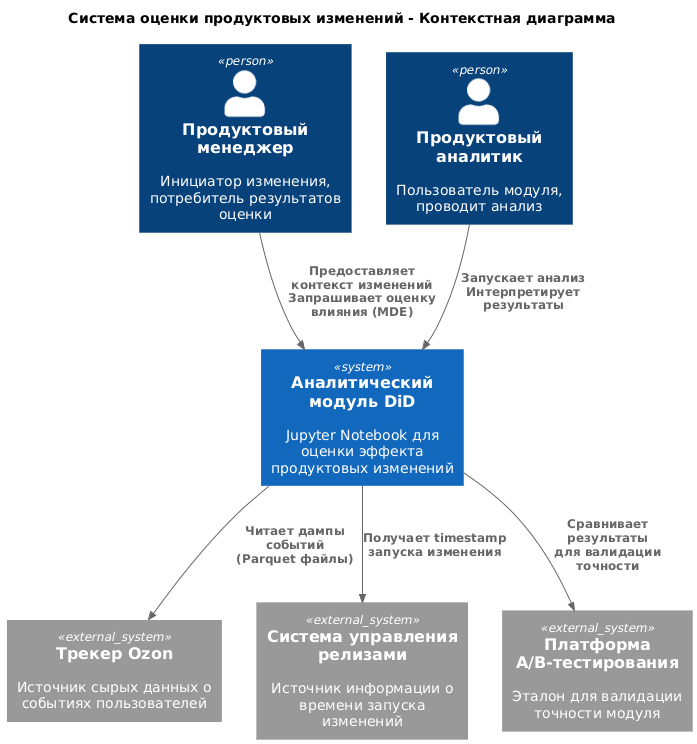

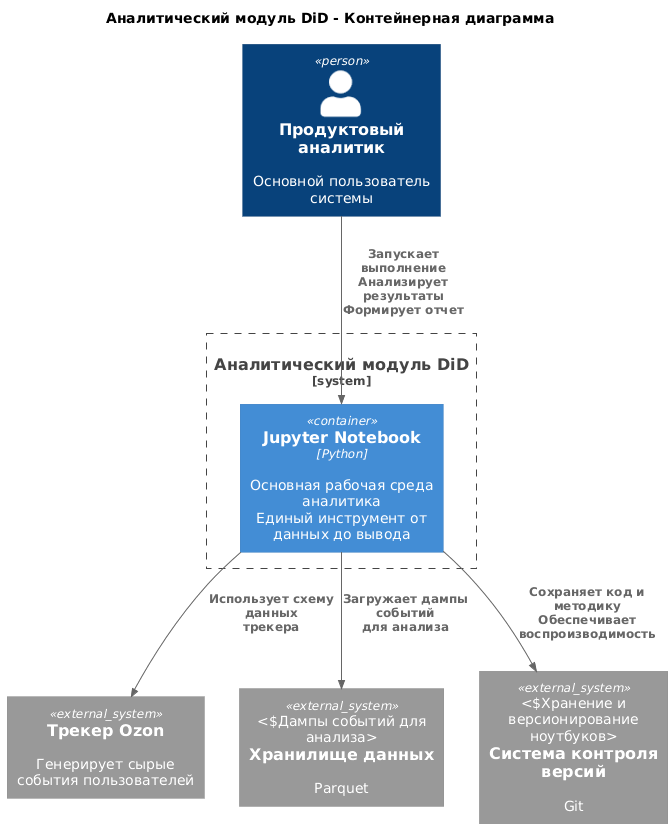

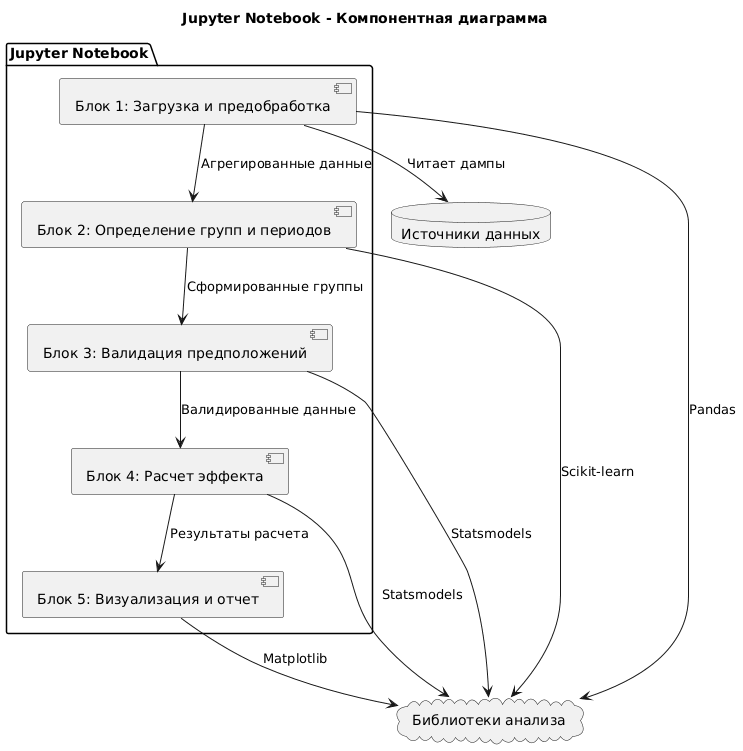

**3.3. Принципы проектирования**

- **Интерпретируемость**: Каждый шаг анализа и его результат должны быть понятны продукт-менеджеру.

- **Сквозная прозрачность**: Код должен явно показывать, как были сформированы группы, как проверялись предположения и как был посчитан эффект.

- **Верифицируемость**: Обязательная автоматическая проверка ключевого предположения о параллельных трендах.

- **Модульность**: Каждый этап анализа выделен в логический блок для легкой модификации и повторного использования.

**4. СВЯЗНОСТЬ И ИНТЕГРАЦИЯ**

```mermaid
graph TB
    %% Внешние источники данных
    ozon_tracker["Трекер Ozon<br/>Сырые события<br/>"]
    release_info["Система управления релизами<br/>Мета-информация"]
    
    %% Основные компоненты системы
    data_loader["Блок 1: Загрузка и предобработка<br/>Pandas"]
    group_selector["Блок 2: Определение групп<br/>Scikit-learn"]
    validation["Блок 3: Валидация предположений<br/>StatsModels"]
    calculator["Блок 4: Расчет эффекта<br/>Diff-in-Diff + Bootstrap"]
    reporter["Блок 5: Визуализация и отчет<br/>Matplotlib/Seaborn"]
    
    %% Пользователи
    analyst["Продуктовый аналитик<br/>Jupyter Notebook"]
    pm["Продукт-менеджер<br/>Финальный отчет"]
    
    %% Верификация (опционально)
    ab_test>Исторические A/B-тесты<br/>для верификации]
    
    %% Связи данных
    ozon_tracker --> data_loader
    user_db --> data_loader
    release_info --> data_loader
    
    %% Аналитический пайплайн
    data_loader --> group_selector
    group_selector --> validation
    validation --> calculator
    calculator --> reporter
    
    %% Пользовательское взаимодействие
    analyst --> data_loader
    analyst --> group_selector
    analyst --> validation
    analyst --> calculator
    analyst --> reporter
    
    reporter --> pm
    
    %% Верификация точности
    ab_test -.-> calculator
```

Концепция предусматривает **одностороннюю** интеграцию с экосистемой данных Ozon.

- **Источник данных**: Модуль загружает и анализирует дампы сырых событий из трекера Ozon (Parquet), которые являются единым источником истины для любой аналитики, включая A/B-тесты. Таким образом, используется тот же фундамент данных, что и для "золотого стандарта".

- **Контекст изменений**: Для работы метода необходима мета-информация — точная timestamp-отметка момента запуска нового функционала. Эта информация поступает от продукт-менеджера или из системы управления релизами.

- **Верификация**: Для проверки точности прототипа его результаты будут сравниваться с результатами проведенных A/B-тестов на идентичных наборах данных, что является формой косвенной интеграции и валидации против производственного стандарта.

*Все операции производятся внутри Notebook через стандартные библиотеки Python. Такой подход обеспечивает автономность прототипа, сохраняя при этом полную согласованность с данными Ozon*.

**5. ИНФОРМАЦИОННАЯ БЕЗОПАСНОСТЬ**

*Безопасность обеспечивается на уровне процесса и инфраструктуры Ozon*:

- **Работа с дампами**: Аналитик работает с обезличенными или агрегированными дампами данных, предоставленными в соответствии с внутренними политиками безопасности компании.

- **Локальное выполнение**: Данные не покидают защищенный периметр инфраструктуры Ozon (виртуальная рабочая станция или облачное Jupyter-окружение).

- **Соглашение о конфиденциальности**: Код и результаты являются внутренней интеллектуальной собственностью Ozon

**8\. Дорожная карта (Техническая реализация в Jupyter Notebook)**

- **Блок 1: Загрузка и предобработка.**
  - Загрузка дампа событий.
  - Фильтрация: оставляем только события, релевантные анализу (просмотры разделов, целевые действия).
  - Агрегация: преобразование сырых событий в дневные/недельные метрики на пользователя (например, конверсия, количество заходов).
- **Блок 2: Определение групп и периодов.**
  - **Тестовая группа:** Пользователи, которые фактически использовали новый интерфейс меню после даты изменения (определяется по наличию специфических событий).
  - **Контрольная группа:** Автоматический подбор из пользователей, не видевших изменение, но максимально похожих на тестовых по поведению до изменения (например, с помощью sklearn.neighbors.NearestNeighbors по метрикам за предпериод).
  - **Определение периодов:** Чёткое разделение на "до" (pre-period) и "после" (post-period) момента изменения.
- **Блок 3: Валидация и проверка предположений.**
  - **Визуальная проверка параллельных трендов:** Построение графика динамики метрик для обеих групп в pre-period. Тренды должны идти параллельно.
  - **Статистическая проверка:** Проведение теста на равенство средних/трендов в pre-period.
- **Блок 4: Расчёт эффекта (Diff-in-Diff).**
  - Расчет разницы средних метрик между post и pre для тестовой группы.
  - Расчет разницы средних метрик между post и pre для контрольной группы.
  - **Итоговый эффект:** (ΔТестовая_группа - ΔКонтрольная_группа).
  - **Статистическая значимость:** Построение доверительных интервалов для оценки эффекта (бутстрап или через регрессионную модель).
- **Блок 5: Визуализация и отчёт.**
  - Финальный график Diff-in-Diff.
  - Вывод: Текстовая интерпретация результата на русском языке. Пример: \*"С вероятностью 95% можно утверждать, что изменение интерфейса меню привело к увеличению конверсии в целевое действие на 2.1% (95% ДИ: +0.8% до +3.4%)."\*

Концепция соответствует современным стандартам причинного анализа и может быть реализована в рамках дорожной карты на 1-2 месяца с последующей апробацией на реальных исторических данных Ozon